In [1]:
#loading train and test data
from google.colab import drive 
from google.colab import files
uploaded = files.upload()

Saving assignment4_trainn.csv to assignment4_trainn.csv
Saving Asssignment4_test.csv to Asssignment4_test.csv


In [2]:

import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [3]:
train_data = pd.read_csv(io.BytesIO(uploaded['assignment4_trainn.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['Asssignment4_test.csv']))
print(train_data.head())

   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0         1       4.9176        1.0      3.472        0.998        1.0   
1         2       5.0208        1.0      3.531        1.500        2.0   
2         3       4.5429        1.0      2.275        1.175        1.0   
3         4       4.5573        1.0      4.050        1.232        1.0   
4         5       5.0597        1.0      4.455        1.121        1.0   

   # Rooms  # Bedrooms  Age of home Construction type  
0        7           4           42         Apartment  
1        7           4           62             House  
2        6           3           40             Condo  
3        6           3           54         Apartment  
4        6           3           42         Apartment  


 QUESTION 2

In [4]:
x_train= train_data[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']]
y_train= train_data[['Construction type']]

x_test= test_data[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']]
y_test= test_data[['Construction type']]

In [5]:
#fitting on training set
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(x_train, y_train)
# accuracy on test set
y_pred_test = clf.predict(x_test)
print(y_pred_test)
print(y_test)
accuracy_testset= metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_testset)


['Condo' 'Condo' 'Condo' 'Apartment' 'Apartment']
  Construction type
0         Apartment
1             House
2             House
3         Apartment
4         Apartment
0.4


The accuracy on the training set is 40%.

In [6]:
# fitting on test data set
clf2= DecisionTreeClassifier(max_depth =3, random_state = 42)
clf2.fit(x_test,y_test)
#accuracy on train set
y_pred_train = clf2.predict(x_train)
print(y_pred_train)
accuracy_trainset = metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_trainset)

['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment'
 'Apartment' 'House' 'House' 'House' 'Apartment' 'Apartment' 'Apartment'
 'Apartment' 'Apartment' 'House' 'Apartment' 'Apartment' 'Apartment'
 'House']
0.35


The accuracy on the test set is 35%.

Question 2.
What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.

Restricting the depth of the tree fights overfitting the decision tree. 

Trying max depths=[3,4,5,6,7] and finding the best value. 

In [7]:
accuracy= [ ]
for index in range(2,15):
  clf = DecisionTreeClassifier(max_depth =index)
  clf.fit(x_train, y_train)
  # accuracy on test set
  y_pred_test = clf.predict(x_test)
  accuracy_testset= metrics.accuracy_score(y_test,y_pred_test)
  accuracy.append(accuracy_testset)
  
print(accuracy)

[0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


using a for loop in finding the best value for max depth the anser is 2.
max depth= 2
the accuracy produced was 0.6== 60%

Why does restricting the depth have such a strong effect on the classifier performance?


It is necesary to restrict the depth of your tree because, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data. This is one of the root causes of overfitting in decision trees because your model will fit perfectly for the training data and will not be able to fit your test data well. 

In [8]:
# because the best performing tree will have max depth of 2 I decided to redo my tree with depth of 2, 
#fitting on training set
clf = DecisionTreeClassifier(max_depth =2, random_state = 42)
clf.fit(x_train, y_train)
# accuracy on test set
y_pred_test = clf.predict(x_test)
print(y_pred_test)
print(y_test)
accuracy_testset= metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_testset)

['Apartment' 'Apartment' 'House' 'Apartment' 'Apartment']
  Construction type
0         Apartment
1             House
2             House
3         Apartment
4         Apartment
0.8


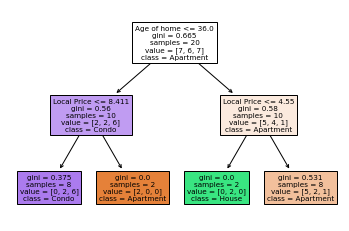

In [9]:
# visualizing the tree 
#!pip install graphviz
import graphviz
from sklearn import tree
fn=['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']
cn=['Apartment','House','Condo']
tree.plot_tree(clf,feature_names=fn,class_names=cn, filled=True);
#fig.savefig('housing.png')

In [10]:
# making the prediction
#loading prediction set
from google.colab import drive 
from google.colab import files
uploaded = files.upload()


Saving prediction.csv to prediction.csv


QUESTION 2 NUMBER 4

In [11]:
pred = pd.read_csv(io.BytesIO(uploaded['prediction.csv']))
#print(pred)
pred_data= clf.predict(pred)
print(pred_data)

['Apartment']


based on the example, local price= 9.0384, bathrooms= 1, land area= 7.8, living area= 1.5, number of garages=1.5, number of rooms=7, number of bedrooms=3, age of home= 23, the classification is an apartment.

QUESTION 3 KNN

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.2, 0.2, 0.2, 0.2, 0.2]


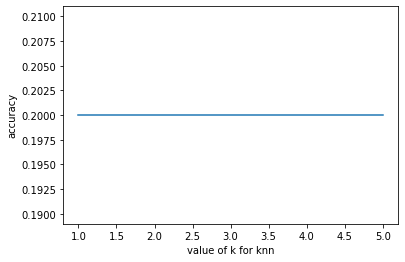

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# using different k and recording the accuracy
k_range= range(1,6)
scores={}
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))


print(scores_list)

#plotting

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy')
plt.show()

From my plot above, the accuracy of my train data stays consistent with an accuracy of 20%. I decided to choose k=5, because from k=1 through 5, the accuracy stays the same 0.2.

In [14]:
# fitting using n_neighbors of 6
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
print(y_pred)

['Apartment' 'Apartment' 'Apartment' 'House' 'House']


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


  QUESTION 1

In [17]:
# selecting the class= apartment
apartment= train_data.loc[train_data['Construction type']=='Apartment']
apartment=apartment[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']]


# apartment
lp_apartment_mean= apartment['Local Price'].mean()
lp_apartment_var = apartment['Local Price'].var()

bath_apartment_mean= apartment['Bathrooms'].mean()
bath_apartment_var = apartment['Bathrooms'].var()

la_apartment_mean= apartment['Land Area'].mean()
la_apartment_var = apartment['Land Area'].var()

livarea_apartment_mean= apartment['Living area'].mean()
livarea_apartment_var = apartment['Living area'].var()

garage_apartment_mean= apartment['# Garages'].mean()
garage_apartment_var = apartment['# Garages'].var()

rooms_apartment_mean= apartment['# Rooms'].mean()
rooms_apartment_var = apartment['# Rooms'].var()

bedrooms_apartment_mean= apartment['# Bedrooms'].mean()
bedrooms_apartment_var = apartment['# Bedrooms'].var()

age_apartment_mean= apartment['Age of home'].mean()
age_apartment_var = apartment['Age of home'].var()


#cal conditional prob for the class apartment
# using the query points from the test data:
#local price= 6.0931, bathrooms=1.5, landarea= 6.7265, living area= 1.652, garages=1,rooms=6, bedrooms=3,age=44

prob_lp_apartment= -0.5*(np.log(2*np.pi*lp_apartment_var))  - 0.5*((6.0931-lp_apartment_mean)**2)/lp_apartment_var
prob_bath_apartment = -0.5*(np.log(2*np.pi*bath_apartment_var))  - 0.5*((1.5-bath_apartment_mean)**2)/bath_apartment_var
prob_la_apartment = -0.5*(np.log(2*np.pi*la_apartment_var))  - 0.5*((6.7265-la_apartment_mean)**2)/la_apartment_var
prob_livarea_apartment= -0.5*(np.log(2*np.pi*livarea_apartment_var))  - 0.5*((1.652-livarea_apartment_mean)**2)/livarea_apartment_var
prob_garage_apartment = -0.5*(np.log(2*np.pi*garage_apartment_var))  - 0.5*((1-garage_apartment_mean)**2)/garage_apartment_var
prob_rooms_apartment = -0.5*(np.log(2*np.pi*rooms_apartment_var))  - 0.5*((6-rooms_apartment_mean)**2)/rooms_apartment_var
prob_bedrooms_apartment = -0.5*(np.log(2*np.pi*bedrooms_apartment_var))  - 0.5*((3-bedrooms_apartment_mean)**2)/bedrooms_apartment_var
prob_age_apartment = -0.5*(np.log(2*np.pi*age_apartment_var))  - 0.5*((44-age_apartment_mean)**2)/age_apartment_var


# posterior of apartment for the first query point
prob_apartment= 0.35
prosteior_apartment= prob_apartment * prob_lp_apartment * prob_bath_apartment * prob_la_apartment * prob_livarea_apartment * prob_garage_apartment * prob_rooms_apartment * prob_bedrooms_apartment * prob_age_apartment
#print(prosteior_apartment)





# selecting the class= house 
house= train_data.loc[train_data['Construction type']=='House']
house=house[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']]
#print(house)

lp_house_mean= house['Local Price'].mean()
lp_house_var = house['Local Price'].var()

bath_house_mean= house['Bathrooms'].mean()
bath_house_var = house['Bathrooms'].var()

la_house_mean= house['Land Area'].mean()
la_house_var = house['Land Area'].var()

livarea_house_mean= house['Living area'].mean()
livarea_house_var = house['Living area'].var()

garage_house_mean= house['# Garages'].mean()
garage_house_var = house['# Garages'].var()

rooms_house_mean= house['# Rooms'].mean()
rooms_house_var = house['# Rooms'].var()

bedrooms_house_mean= house['# Bedrooms'].mean()
bedrooms_house_var = house['# Bedrooms'].var()

age_house_mean= house['Age of home'].mean()
age_house_var = house['Age of home'].var()

#cal conditional prob for the class house
# using the query points from the test data:
#local price= 6.0931, bathrooms=1.5, landarea= 6.7265, living area= 1.652, garages=1,rooms=6, bedrooms=3,age=44

prob_lp_house= -0.5*(np.log(2*np.pi*lp_house_var))  - 0.5*((6.0931-lp_house_mean)**2)/lp_house_var
prob_bath_house = -0.5*(np.log(2*np.pi*bath_house_var))  - 0.5*((1.5-bath_house_mean)**2)/bath_house_var
prob_la_house = -0.5*(np.log(2*np.pi*la_house_var))  - 0.5*((6.7265-la_house_mean)**2)/la_house_var
prob_livarea_house= -0.5*(np.log(2*np.pi*livarea_house_var))  - 0.5*((1.652-livarea_house_mean)**2)/livarea_house_var
prob_garage_house = -0.5*(np.log(2*np.pi*garage_house_var))  - 0.5*((1-garage_house_mean)**2)/garage_house_var
prob_rooms_house = -0.5*(np.log(2*np.pi*rooms_house_var))  - 0.5*((6-rooms_house_mean)**2)/rooms_house_var
prob_bedrooms_house = -0.5*(np.log(2*np.pi*bedrooms_house_var))  - 0.5*((3-bedrooms_house_mean)**2)/bedrooms_house_var
prob_age_house = -0.5*(np.log(2*np.pi*age_house_var))  - 0.5*((44-age_house_mean)**2)/age_house_var


# posterior of apartment for the first query point
prob_house= 0.35
prosteior_house= prob_house * prob_lp_house * prob_bath_house * prob_la_house * prob_livarea_house * prob_garage_house * prob_rooms_house * prob_bedrooms_house * prob_age_house
#print(prosteior_house)






# selecting the class = condo 
condo= train_data.loc[train_data['Construction type']=='Condo']
condo=condo[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms','# Bedrooms','Age of home']]


lp_condo_mean= condo['Local Price'].mean()
lp_condo_var = condo['Local Price'].var()

bath_condo_mean= condo['Bathrooms'].mean()
bath_condo_var = condo['Bathrooms'].var()

la_condo_mean= condo['Land Area'].mean()
la_condo_var = condo['Land Area'].var()

livarea_condo_mean= condo['Living area'].mean()
livarea_condo_var = condo['Living area'].var()

garage_condo_mean= condo['# Garages'].mean()
garage_condo_var = condo['# Garages'].var()

rooms_condo_mean= condo['# Rooms'].mean()
rooms_condo_var = condo['# Rooms'].var()

bedrooms_condo_mean= condo['# Bedrooms'].mean()
bedrooms_condo_var = condo['# Bedrooms'].var()

age_condo_mean= condo['Age of home'].mean()
age_condo_var = condo['Age of home'].var()

#cal conditional prob for the class condo
# using the first query points from the test data:

#local price= 6.0931, bathrooms=1.5, landarea= 6.7265, living area= 1.652, garages=1,rooms=6, bedrooms=3,age=44
prob_lp_condo= -0.5*(np.log(2*np.pi*lp_condo_var))  - 0.5*((6.0931-lp_condo_mean)**2)/lp_condo_var
prob_bath_condo = -0.5*(np.log(2*np.pi*bath_condo_var))  - 0.5*((1.5-bath_condo_mean)**2)/bath_condo_var
prob_la_condo = -0.5*(np.log(2*np.pi*la_condo_var))  - 0.5*((6.7265-la_condo_mean)**2)/la_condo_var
prob_livarea_condo= -0.5*(np.log(2*np.pi*livarea_condo_var))  - 0.5*((1.652-livarea_condo_mean)**2)/livarea_condo_var
prob_garage_condo = -0.5*(np.log(2*np.pi*garage_condo_var))  - 0.5*((1-garage_condo_mean)**2)/garage_condo_var
prob_rooms_condo = -0.5*(np.log(2*np.pi*rooms_condo_var))  - 0.5*((6-rooms_condo_mean)**2)/rooms_condo_var
prob_bedrooms_condo = -0.5*(np.log(2*np.pi*bedrooms_condo_var))  - 0.5*((3-bedrooms_condo_mean)**2)/bedrooms_condo_var
prob_age_condo = -0.5*(np.log(2*np.pi*age_condo_var))  - 0.5*((44-age_condo_mean)**2)/age_condo_var


# posterior of apartment for the first query point
prob_condo= 0.35
prosteior_condo= prob_condo * prob_lp_condo * prob_bath_condo * prob_la_condo * prob_livarea_condo * prob_garage_condo * prob_rooms_condo * prob_bedrooms_condo * prob_age_condo


prosterior_sample1= [prosteior_apartment,prosteior_house,prosteior_condo]
classification_sample1= max(prosterior_sample1)
print('prosteior_apartment:',prosteior_apartment)
print('prosteior_house:',prosteior_house)
print('prosteior_condo:',prosteior_condo)
print('final classification: apartment = ',classification_sample1)


prosteior_apartment: 1.3116616574566278
prosteior_house: 0.04092886499223835
prosteior_condo: 1.2983570411097662
final classification: apartment =  1.3116616574566278


In [18]:

# using the second query points from the test data:
#local price= 8.3607, bathrooms=1.5, landarea= 9.15, living area= 1.777, garages=2,rooms=8, bedrooms=4,age=48



#cal conditional prob for the class apartment
prob_lp_apartment= -0.5*(np.log(2*np.pi*lp_apartment_var))  - 0.5*((8.3607-lp_apartment_mean)**2)/lp_apartment_var
prob_bath_apartment = -0.5*(np.log(2*np.pi*bath_apartment_var))  - 0.5*((1.5-bath_apartment_mean)**2)/bath_apartment_var
prob_la_apartment = -0.5*(np.log(2*np.pi*la_apartment_var))  - 0.5*((9.15-la_apartment_mean)**2)/la_apartment_var
prob_livarea_apartment= -0.5*(np.log(2*np.pi*livarea_apartment_var))  - 0.5*((1.777-livarea_apartment_mean)**2)/livarea_apartment_var
prob_garage_apartment = -0.5*(np.log(2*np.pi*garage_apartment_var))  - 0.5*((2-garage_apartment_mean)**2)/garage_apartment_var
prob_rooms_apartment = -0.5*(np.log(2*np.pi*rooms_apartment_var))  - 0.5*((8-rooms_apartment_mean)**2)/rooms_apartment_var
prob_bedrooms_apartment = -0.5*(np.log(2*np.pi*bedrooms_apartment_var))  - 0.5*((4-bedrooms_apartment_mean)**2)/bedrooms_apartment_var
prob_age_apartment = -0.5*(np.log(2*np.pi*age_apartment_var))  - 0.5*((48-age_apartment_mean)**2)/age_apartment_var


# posterior of apartment for the query point
prob_apartment= 0.35
prosteior_apartment= prob_apartment * prob_lp_apartment * prob_bath_apartment * prob_la_apartment * prob_livarea_apartment * prob_garage_apartment * prob_rooms_apartment * prob_bedrooms_apartment * prob_age_apartment
#print(prosteior_apartment)




#cal conditional prob for the class house
# using the query points from the test data:
#local price= 8.3607, bathrooms=1.5, landarea= 9.15, living area= 1.777, garages=2,rooms=8, bedrooms=4,age=48

prob_lp_house= -0.5*(np.log(2*np.pi*lp_house_var))  - 0.5*((8.3607-lp_house_mean)**2)/lp_house_var
prob_bath_house = -0.5*(np.log(2*np.pi*bath_house_var))  - 0.5*((1.5-bath_house_mean)**2)/bath_house_var
prob_la_house = -0.5*(np.log(2*np.pi*la_house_var))  - 0.5*((9.15-la_house_mean)**2)/la_house_var
prob_livarea_house= -0.5*(np.log(2*np.pi*livarea_house_var))  - 0.5*((1.777-livarea_house_mean)**2)/livarea_house_var
prob_garage_house = -0.5*(np.log(2*np.pi*garage_house_var))  - 0.5*((2-garage_house_mean)**2)/garage_house_var
prob_rooms_house = -0.5*(np.log(2*np.pi*rooms_house_var))  - 0.5*((8-rooms_house_mean)**2)/rooms_house_var
prob_bedrooms_house = -0.5*(np.log(2*np.pi*bedrooms_house_var))  - 0.5*((4-bedrooms_house_mean)**2)/bedrooms_house_var
prob_age_house = -0.5*(np.log(2*np.pi*age_house_var))  - 0.5*((48-age_house_mean)**2)/age_house_var


# posterior of apartment for the first query point
prob_house= 0.35
prosteior_house= prob_house * prob_lp_house * prob_bath_house * prob_la_house * prob_livarea_house * prob_garage_house * prob_rooms_house * prob_bedrooms_house * prob_age_house
#print(prosteior_house)



#cal conditional prob for the class condo
# using the query points from the test data:
#local price= 8.3607, bathrooms=1.5, landarea= 9.15, living area= 1.777, garages=2,rooms=8, bedrooms=4,age=48
prob_lp_condo= -0.5*(np.log(2*np.pi*lp_condo_var))  - 0.5*((8.3607-lp_condo_mean)**2)/lp_condo_var
prob_bath_condo = -0.5*(np.log(2*np.pi*bath_condo_var))  - 0.5*((1.5-bath_condo_mean)**2)/bath_condo_var
prob_la_condo = -0.5*(np.log(2*np.pi*la_condo_var))  - 0.5*((9.15-la_condo_mean)**2)/la_condo_var
prob_livarea_condo= -0.5*(np.log(2*np.pi*livarea_condo_var))  - 0.5*((1.777-livarea_condo_mean)**2)/livarea_condo_var
prob_garage_condo = -0.5*(np.log(2*np.pi*garage_condo_var))  - 0.5*((2-garage_condo_mean)**2)/garage_condo_var
prob_rooms_condo = -0.5*(np.log(2*np.pi*rooms_condo_var))  - 0.5*((8-rooms_condo_mean)**2)/rooms_condo_var
prob_bedrooms_condo = -0.5*(np.log(2*np.pi*bedrooms_condo_var))  - 0.5*((4-bedrooms_condo_mean)**2)/bedrooms_condo_var
prob_age_condo = -0.5*(np.log(2*np.pi*age_condo_var))  - 0.5*((48-age_condo_mean)**2)/age_condo_var


# posterior of apartment for the first query point
prob_condo= 0.30
prosteior_condo= prob_condo * prob_lp_condo * prob_bath_condo * prob_la_condo * prob_livarea_condo * prob_garage_condo * prob_rooms_condo * prob_bedrooms_condo * prob_age_condo


prosterior_sample2= [prosteior_apartment,prosteior_house,prosteior_condo]
classification_sample2= max(prosterior_sample2)
print('prosteior_apartment:',prosteior_apartment)
print('prosteior_house:',prosteior_house)
print('prosteior_condo:',prosteior_condo)
print('final classification: House = ',classification_sample2)


prosteior_apartment: 4.132204056936123
prosteior_house: 698.1618355967717
prosteior_condo: 5.403081390366405
final classification: House =  698.1618355967717


In [19]:
# using the third query points from the test data:
#local price= 8.14, bathrooms=1, landarea= 8, living area= 1.504, garages=2,rooms=7, bedrooms=3,age=3



#cal conditional prob for the class apartment
prob_lp_apartment= -0.5*(np.log(2*np.pi*lp_apartment_var))  - 0.5*((8.14-lp_apartment_mean)**2)/lp_apartment_var
prob_bath_apartment = -0.5*(np.log(2*np.pi*bath_apartment_var))  - 0.5*((1-bath_apartment_mean)**2)/bath_apartment_var
prob_la_apartment = -0.5*(np.log(2*np.pi*la_apartment_var))  - 0.5*((8-la_apartment_mean)**2)/la_apartment_var
prob_livarea_apartment= -0.5*(np.log(2*np.pi*livarea_apartment_var))  - 0.5*((1.504-livarea_apartment_mean)**2)/livarea_apartment_var
prob_garage_apartment = -0.5*(np.log(2*np.pi*garage_apartment_var))  - 0.5*((2-garage_apartment_mean)**2)/garage_apartment_var
prob_rooms_apartment = -0.5*(np.log(2*np.pi*rooms_apartment_var))  - 0.5*((7-rooms_apartment_mean)**2)/rooms_apartment_var
prob_bedrooms_apartment = -0.5*(np.log(2*np.pi*bedrooms_apartment_var))  - 0.5*((3-bedrooms_apartment_mean)**2)/bedrooms_apartment_var
prob_age_apartment = -0.5*(np.log(2*np.pi*age_apartment_var))  - 0.5*((3-age_apartment_mean)**2)/age_apartment_var


# posterior of apartment for the query point
prob_apartment= 0.35
prosteior_apartment= prob_apartment * prob_lp_apartment * prob_bath_apartment * prob_la_apartment * prob_livarea_apartment * prob_garage_apartment * prob_rooms_apartment * prob_bedrooms_apartment * prob_age_apartment
#print(prosteior_apartment)




#cal conditional prob for the class house
# using the query points from the test data:
#local price= 8.14, bathrooms=1, landarea= 8, living area= 1.504, garages=2,rooms=7, bedrooms=3,age=3

prob_lp_house= -0.5*(np.log(2*np.pi*lp_house_var))  - 0.5*((8.14-lp_house_mean)**2)/lp_house_var
prob_bath_house = -0.5*(np.log(2*np.pi*bath_house_var))  - 0.5*((1-bath_house_mean)**2)/bath_house_var
prob_la_house = -0.5*(np.log(2*np.pi*la_house_var))  - 0.5*((8-la_house_mean)**2)/la_house_var
prob_livarea_house= -0.5*(np.log(2*np.pi*livarea_house_var))  - 0.5*((1.504-livarea_house_mean)**2)/livarea_house_var
prob_garage_house = -0.5*(np.log(2*np.pi*garage_house_var))  - 0.5*((2-garage_house_mean)**2)/garage_house_var
prob_rooms_house = -0.5*(np.log(2*np.pi*rooms_house_var))  - 0.5*((7-rooms_house_mean)**2)/rooms_house_var
prob_bedrooms_house = -0.5*(np.log(2*np.pi*bedrooms_house_var))  - 0.5*((3-bedrooms_house_mean)**2)/bedrooms_house_var
prob_age_house = -0.5*(np.log(2*np.pi*age_house_var))  - 0.5*((3-age_house_mean)**2)/age_house_var


# posterior of apartment for the first query point
prob_house= 0.35
prosteior_house= prob_house * prob_lp_house * prob_bath_house * prob_la_house * prob_livarea_house * prob_garage_house * prob_rooms_house * prob_bedrooms_house * prob_age_house
#print(prosteior_house)



#cal conditional prob for the class condo
# using the query points from the test data:
#local price= 8.14, bathrooms=1, landarea= 8, living area= 1.504, garages=2,rooms=7, bedrooms=3,age=3

prob_lp_condo= -0.5*(np.log(2*np.pi*lp_condo_var))  - 0.5*((8.14-lp_condo_mean)**2)/lp_condo_var
prob_bath_condo = -0.5*(np.log(2*np.pi*bath_condo_var))  - 0.5*((1-bath_condo_mean)**2)/bath_condo_var
prob_la_condo = -0.5*(np.log(2*np.pi*la_condo_var))  - 0.5*((8-la_condo_mean)**2)/la_condo_var
prob_livarea_condo= -0.5*(np.log(2*np.pi*livarea_condo_var))  - 0.5*((1.504-livarea_condo_mean)**2)/livarea_condo_var
prob_garage_condo = -0.5*(np.log(2*np.pi*garage_condo_var))  - 0.5*((2-garage_condo_mean)**2)/garage_condo_var
prob_rooms_condo = -0.5*(np.log(2*np.pi*rooms_condo_var))  - 0.5*((7-rooms_condo_mean)**2)/rooms_condo_var
prob_bedrooms_condo = -0.5*(np.log(2*np.pi*bedrooms_condo_var))  - 0.5*((3-bedrooms_condo_mean)**2)/bedrooms_condo_var
prob_age_condo = -0.5*(np.log(2*np.pi*age_condo_var))  - 0.5*((3-age_condo_mean)**2)/age_condo_var


# posterior of apartment for the first query point
prob_condo= 0.30
prosteior_condo= prob_condo * prob_lp_condo * prob_bath_condo * prob_la_condo * prob_livarea_condo * prob_garage_condo * prob_rooms_condo * prob_bedrooms_condo * prob_age_condo


prosterior_sample3= [prosteior_apartment,prosteior_house,prosteior_condo]
classification_sample3= max(prosterior_sample3)
print('prosteior_apartment:',prosteior_apartment)
print('prosteior_house:',prosteior_house)
print('prosteior_condo:',prosteior_condo)
print('final classification: House = ',classification_sample3)

prosteior_apartment: 4.55969173639582
prosteior_house: 8.60671992987059
prosteior_condo: 6.487868491726928
final classification: House =  8.60671992987059


In [20]:
# using the fourth query points from the test data:
#local price= 9.1416, bathrooms=1.5, landarea= 7.3262, living area= 1.831, garages=1.5,rooms=8, bedrooms=4,age=31



#cal conditional prob for the class apartment
prob_lp_apartment= -0.5*(np.log(2*np.pi*lp_apartment_var))  - 0.5*((9.1416-lp_apartment_mean)**2)/lp_apartment_var
prob_bath_apartment = -0.5*(np.log(2*np.pi*bath_apartment_var))  - 0.5*((1.5-bath_apartment_mean)**2)/bath_apartment_var
prob_la_apartment = -0.5*(np.log(2*np.pi*la_apartment_var))  - 0.5*((7.3262-la_apartment_mean)**2)/la_apartment_var
prob_livarea_apartment= -0.5*(np.log(2*np.pi*livarea_apartment_var))  - 0.5*((1.831-livarea_apartment_mean)**2)/livarea_apartment_var
prob_garage_apartment = -0.5*(np.log(2*np.pi*garage_apartment_var))  - 0.5*((1.5-garage_apartment_mean)**2)/garage_apartment_var
prob_rooms_apartment = -0.5*(np.log(2*np.pi*rooms_apartment_var))  - 0.5*((8-rooms_apartment_mean)**2)/rooms_apartment_var
prob_bedrooms_apartment = -0.5*(np.log(2*np.pi*bedrooms_apartment_var))  - 0.5*((4-bedrooms_apartment_mean)**2)/bedrooms_apartment_var
prob_age_apartment = -0.5*(np.log(2*np.pi*age_apartment_var))  - 0.5*((31-age_apartment_mean)**2)/age_apartment_var


# posterior of apartment for the query point
prob_apartment= 0.35
prosteior_apartment= prob_apartment * prob_lp_apartment * prob_bath_apartment * prob_la_apartment * prob_livarea_apartment * prob_garage_apartment * prob_rooms_apartment * prob_bedrooms_apartment * prob_age_apartment
#print(prosteior_apartment)




#cal conditional prob for the class house
# using the query points from the test data:
#local price= 9.1416, bathrooms=1.5, landarea= 7.3262, living area= 1.831, garages=1.5,rooms=8, bedrooms=4,age=31

prob_lp_house= -0.5*(np.log(2*np.pi*lp_house_var))  - 0.5*((9.1416-lp_house_mean)**2)/lp_house_var
prob_bath_house = -0.5*(np.log(2*np.pi*bath_house_var))  - 0.5*((1.5-bath_house_mean)**2)/bath_house_var
prob_la_house = -0.5*(np.log(2*np.pi*la_house_var))  - 0.5*((7.3262-la_house_mean)**2)/la_house_var
prob_livarea_house= -0.5*(np.log(2*np.pi*livarea_house_var))  - 0.5*((1.831-livarea_house_mean)**2)/livarea_house_var
prob_garage_house = -0.5*(np.log(2*np.pi*garage_house_var))  - 0.5*((1.5-garage_house_mean)**2)/garage_house_var
prob_rooms_house = -0.5*(np.log(2*np.pi*rooms_house_var))  - 0.5*((7-rooms_house_mean)**2)/rooms_house_var
prob_bedrooms_house = -0.5*(np.log(2*np.pi*bedrooms_house_var))  - 0.5*((8-bedrooms_house_mean)**2)/bedrooms_house_var
prob_age_house = -0.5*(np.log(2*np.pi*age_house_var))  - 0.5*((31-age_house_mean)**2)/age_house_var


# posterior of apartment for the first query point
prob_house= 0.35
prosteior_house= prob_house * prob_lp_house * prob_bath_house * prob_la_house * prob_livarea_house * prob_garage_house * prob_rooms_house * prob_bedrooms_house * prob_age_house
#print(prosteior_house)



#cal conditional prob for the class condo
# using the query points from the test data:
#local price= 9.1416, bathrooms=1.5, landarea= 7.3262, living area= 1.831, garages=1.5,rooms=8, bedrooms=4,age=31

prob_lp_condo= -0.5*(np.log(2*np.pi*lp_condo_var))  - 0.5*((9.1416-lp_condo_mean)**2)/lp_condo_var
prob_bath_condo = -0.5*(np.log(2*np.pi*bath_condo_var))  - 0.5*((1.5-bath_condo_mean)**2)/bath_condo_var
prob_la_condo = -0.5*(np.log(2*np.pi*la_condo_var))  - 0.5*((7.3262-la_condo_mean)**2)/la_condo_var
prob_livarea_condo= -0.5*(np.log(2*np.pi*livarea_condo_var))  - 0.5*((1.831-livarea_condo_mean)**2)/livarea_condo_var
prob_garage_condo = -0.5*(np.log(2*np.pi*garage_condo_var))  - 0.5*((1.5-garage_condo_mean)**2)/garage_condo_var
prob_rooms_condo = -0.5*(np.log(2*np.pi*rooms_condo_var))  - 0.5*((8-rooms_condo_mean)**2)/rooms_condo_var
prob_bedrooms_condo = -0.5*(np.log(2*np.pi*bedrooms_condo_var))  - 0.5*((4-bedrooms_condo_mean)**2)/bedrooms_condo_var
prob_age_condo = -0.5*(np.log(2*np.pi*age_condo_var))  - 0.5*((31-age_condo_mean)**2)/age_condo_var


# posterior of apartment for the query point
prob_condo= 0.30
prosteior_condo= prob_condo * prob_lp_condo * prob_bath_condo * prob_la_condo * prob_livarea_condo * prob_garage_condo * prob_rooms_condo * prob_bedrooms_condo * prob_age_condo


prosterior_sample4= [prosteior_apartment,prosteior_house,prosteior_condo]
classification_sample4= max(prosterior_sample4)
print('prosteior_apartment:',prosteior_apartment)
print('prosteior_house:',prosteior_house)
print('prosteior_condo:',prosteior_condo)
print('final classification: House = ',classification_sample4)

prosteior_apartment: 2.0471009069530037
prosteior_house: 4657.474728801268
prosteior_condo: 1.2180036652732016
final classification: House =  4657.474728801268


In [21]:
# using the fifth query points from the test data:
#local price= 12, bathrooms=1.5, landarea= 5, living area= 1.2, garages=2,rooms=6, bedrooms=3,age=30



#cal conditional prob for the class apartment
prob_lp_apartment= -0.5*(np.log(2*np.pi*lp_apartment_var))  - 0.5*((12-lp_apartment_mean)**2)/lp_apartment_var
prob_bath_apartment = -0.5*(np.log(2*np.pi*bath_apartment_var))  - 0.5*((1.5-bath_apartment_mean)**2)/bath_apartment_var
prob_la_apartment = -0.5*(np.log(2*np.pi*la_apartment_var))  - 0.5*((5-la_apartment_mean)**2)/la_apartment_var
prob_livarea_apartment= -0.5*(np.log(2*np.pi*livarea_apartment_var))  - 0.5*((1.2-livarea_apartment_mean)**2)/livarea_apartment_var
prob_garage_apartment = -0.5*(np.log(2*np.pi*garage_apartment_var))  - 0.5*((2-garage_apartment_mean)**2)/garage_apartment_var
prob_rooms_apartment = -0.5*(np.log(2*np.pi*rooms_apartment_var))  - 0.5*((6-rooms_apartment_mean)**2)/rooms_apartment_var
prob_bedrooms_apartment = -0.5*(np.log(2*np.pi*bedrooms_apartment_var))  - 0.5*((3-bedrooms_apartment_mean)**2)/bedrooms_apartment_var
prob_age_apartment = -0.5*(np.log(2*np.pi*age_apartment_var))  - 0.5*((30-age_apartment_mean)**2)/age_apartment_var


# posterior of apartment for the query point
prob_apartment= 0.35
prosteior_apartment= prob_apartment * prob_lp_apartment * prob_bath_apartment * prob_la_apartment * prob_livarea_apartment * prob_garage_apartment * prob_rooms_apartment * prob_bedrooms_apartment * prob_age_apartment
#print(prosteior_apartment)




#cal conditional prob for the class house
# using the query points from the test data:
#local price= 12, bathrooms=1.5, landarea= 5, living area= 1.2, garages=2,rooms=6, bedrooms=3,age=30

prob_lp_house= -0.5*(np.log(2*np.pi*lp_house_var))  - 0.5*((12-lp_house_mean)**2)/lp_house_var
prob_bath_house = -0.5*(np.log(2*np.pi*bath_house_var))  - 0.5*((1.5-bath_house_mean)**2)/bath_house_var
prob_la_house = -0.5*(np.log(2*np.pi*la_house_var))  - 0.5*((5-la_house_mean)**2)/la_house_var
prob_livarea_house= -0.5*(np.log(2*np.pi*livarea_house_var))  - 0.5*((1.2-livarea_house_mean)**2)/livarea_house_var
prob_garage_house = -0.5*(np.log(2*np.pi*garage_house_var))  - 0.5*((2-garage_house_mean)**2)/garage_house_var
prob_rooms_house = -0.5*(np.log(2*np.pi*rooms_house_var))  - 0.5*((6-rooms_house_mean)**2)/rooms_house_var
prob_bedrooms_house = -0.5*(np.log(2*np.pi*bedrooms_house_var))  - 0.5*((3-bedrooms_house_mean)**2)/bedrooms_house_var
prob_age_house = -0.5*(np.log(2*np.pi*age_house_var))  - 0.5*((30-age_house_mean)**2)/age_house_var


# posterior of apartment for the first query point
prob_house= 0.35
prosteior_house= prob_house * prob_lp_house * prob_bath_house * prob_la_house * prob_livarea_house * prob_garage_house * prob_rooms_house * prob_bedrooms_house * prob_age_house
#print(prosteior_house)



#cal conditional prob for the class condo
# using the query points from the test data:
#local price= 12, bathrooms=1.5, landarea= 5, living area= 1.2, garages=2,rooms=6, bedrooms=3,age=30

prob_lp_condo= -0.5*(np.log(2*np.pi*lp_condo_var))  - 0.5*((12-lp_condo_mean)**2)/lp_condo_var
prob_bath_condo = -0.5*(np.log(2*np.pi*bath_condo_var))  - 0.5*((1.5-bath_condo_mean)**2)/bath_condo_var
prob_la_condo = -0.5*(np.log(2*np.pi*la_condo_var))  - 0.5*((5-la_condo_mean)**2)/la_condo_var
prob_livarea_condo= -0.5*(np.log(2*np.pi*livarea_condo_var))  - 0.5*((1.2-livarea_condo_mean)**2)/livarea_condo_var
prob_garage_condo = -0.5*(np.log(2*np.pi*garage_condo_var))  - 0.5*((2-garage_condo_mean)**2)/garage_condo_var
prob_rooms_condo = -0.5*(np.log(2*np.pi*rooms_condo_var))  - 0.5*((6-rooms_condo_mean)**2)/rooms_condo_var
prob_bedrooms_condo = -0.5*(np.log(2*np.pi*bedrooms_condo_var))  - 0.5*((3-bedrooms_condo_mean)**2)/bedrooms_condo_var
prob_age_condo = -0.5*(np.log(2*np.pi*age_condo_var))  - 0.5*((30-age_condo_mean)**2)/age_condo_var


# posterior of apartment for the query point
prob_condo= 0.30
prosteior_condo= prob_condo * prob_lp_condo * prob_bath_condo * prob_la_condo * prob_livarea_condo * prob_garage_condo * prob_rooms_condo * prob_bedrooms_condo * prob_age_condo


prosterior_sample5= [prosteior_apartment,prosteior_house,prosteior_condo]
classification_sample5= max(prosterior_sample5)
print('prosteior_apartment:',prosteior_apartment)
print('prosteior_house:',prosteior_house)
print('prosteior_condo:',prosteior_condo)
print('final classification: Apartment = ',classification_sample5)

prosteior_apartment: 4.070634502025633
prosteior_house: -17.128336322743145
prosteior_condo: 3.5807334009514227
final classification: Apartment =  4.070634502025633
